<a href="https://colab.research.google.com/github/BrunoRSalles/Renda-Per-Capita/blob/main/Projeto_Economia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de Dados Economicos do Brasil**

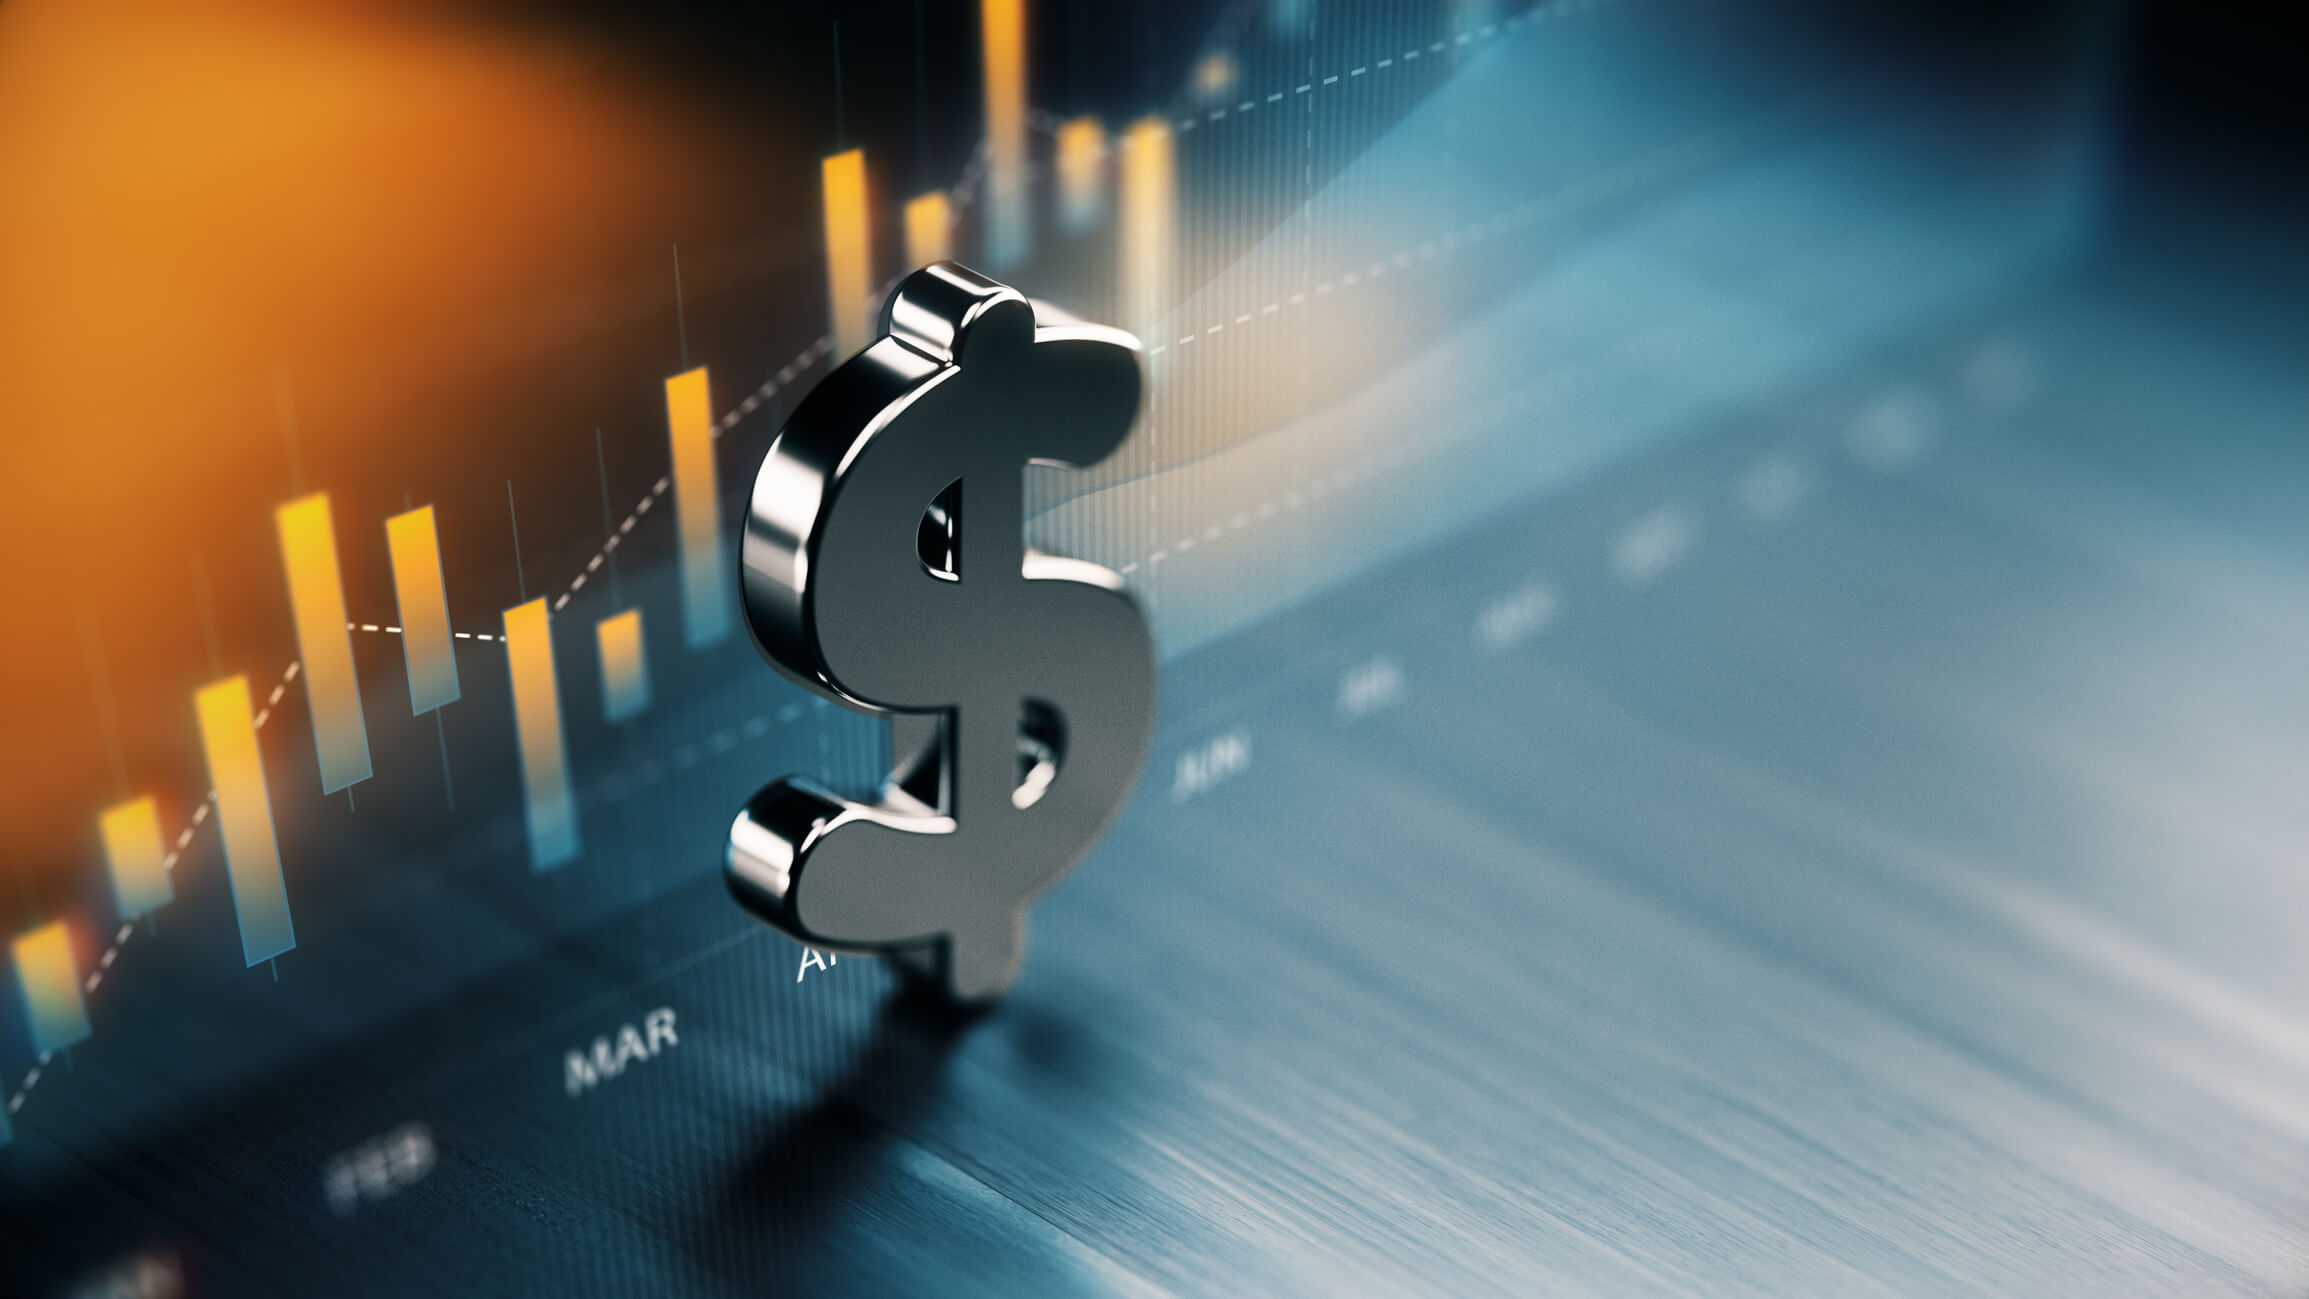

Dados de renda per capita dos estados da união 

link oficial dos dados: http://www.atlasbrasil.org.br/ <p>

**O que é Renda Per Capita?** <p>
A renda per capita é um dos indicadores socioeconômicos que avaliam o grau de desenvolvimento econômico de um determinado lugar. A média é obtida através da divisão do Produto Nacional Bruto (PNB) pelo número total de habitantes.

[Base de Dados para Download](https://docs.google.com/spreadsheets/d/1ieIQN3UjtkYwayuAusZAgvBdR-SXlL1L/edit?usp=sharing&ouid=101707831224147120634&rtpof=true&sd=true)

In [23]:
# Bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dados = pd.read_excel( 'Dados_Pib.xlsx' )
dados.head( 10 )

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
5,Bahia,2013,11.40
6,Ceará,2013,10.40
7,Distrito Federal,2013,52.77
8,Espírito Santo,2013,25.56
9,Goiás,2013,19.68


In [25]:
# Verificando Dimensão dos Dados
dados.shape

(112, 3)

In [26]:
# Verificando se não ha dados nulos
dados.isnull().sum()

Territorialidades    0
Ano                  0
PIB per capita       0
dtype: int64

In [27]:
# Observando os tipos de dados 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Territorialidades  112 non-null    object 
 1   Ano                112 non-null    int64  
 2   PIB per capita     112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [28]:
dados.groupby( by=[ 'Territorialidades', 'Ano' ] ).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

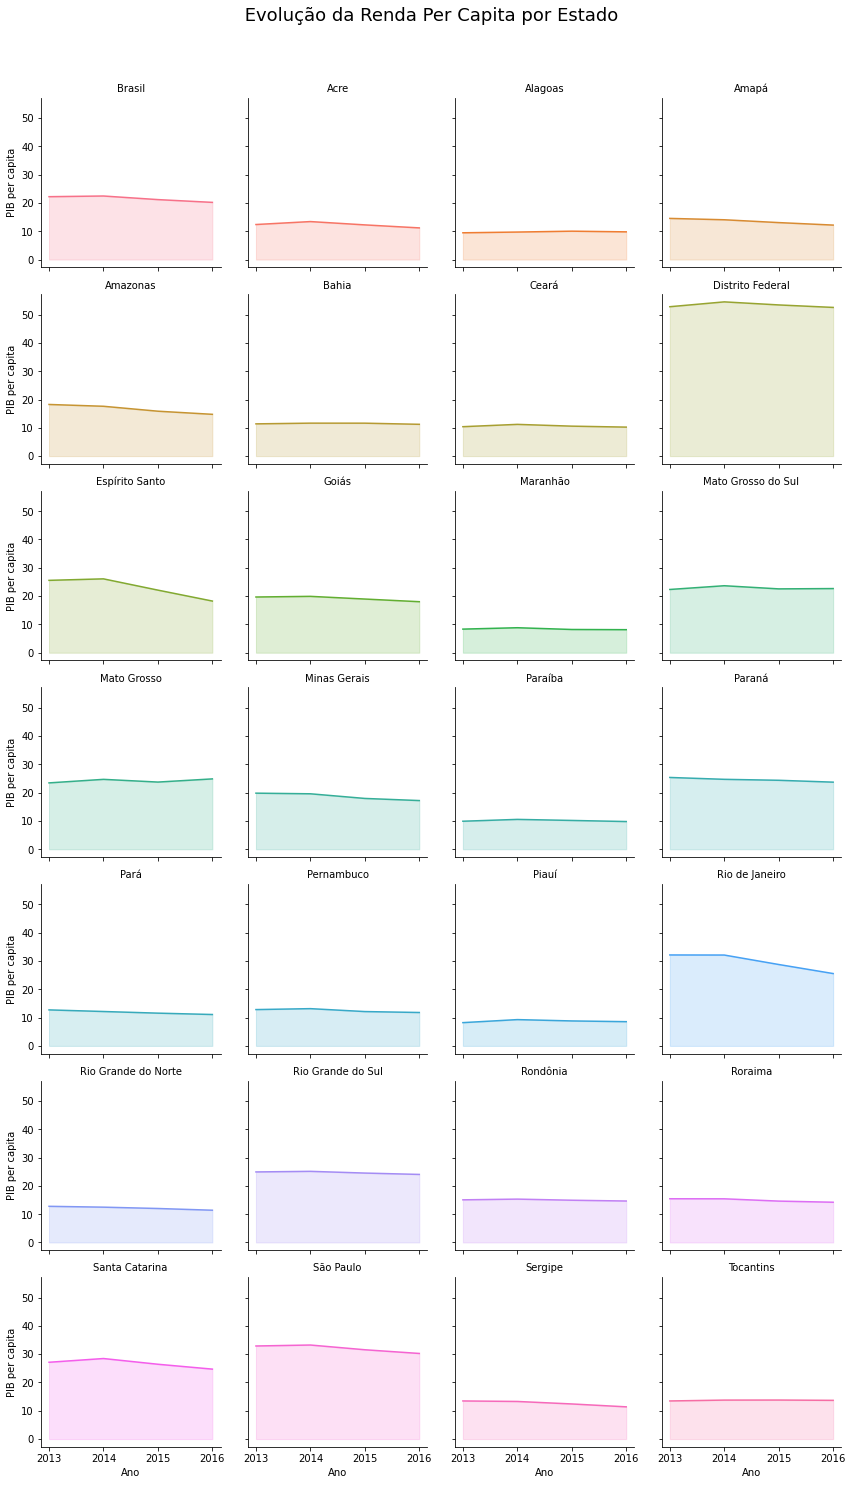

In [29]:
# Sistema de grids

# Cor de fundo
cor = 'f5f5f5'

# Criar o sistema de grids
grid_graficos = sns.FacetGrid( dados, col = 'Territorialidades', hue = 'Territorialidades', col_wrap = 4) 


# Adicionar um grafico de linhas em cada 'vaga' disponivel
grid_graficos = grid_graficos.map( plt.plot, 'Ano', 'PIB per capita' )


# Adicionar um sombra entre a linha e o grafico + Ajuste do titulo
grid_graficos = grid_graficos.map( plt.fill_between, 'Ano', 'PIB per capita', alpha = 0.2 ).set_titles( '{col_name} Territorialidades' )
'''
O alpha serve para que a sombra não sai da mesma cor da linha e sim mais claro pelo parametro
Set_titles com o parametro que usamos foi pra que o nome no grafico se invertece e o sinal de = sumisse
'''


# Filtrando o titulo
grid_graficos = grid_graficos.set_titles( '{col_name}' )
'''
agora usando o col_name ele vai retirar o territorialidades e apenas o nome dos estados
'''


# Adicionando um subtitulo
grid_graficos = grid_graficos.fig.suptitle ( ''' Evolução da Renda Per Capita por Estado''', fontsize = 18 )


# Ajustando
plt.subplots_adjust( top = 0.92 )